In [1]:
# Smart_grid.py
# Antonio, Mec, Vincent
# YakuzAI

from code.smart_grid import load_battery_data, load_house_data, show_district
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from code.battery import Battery
from code.house import House

District one first 20 houses and 5 batteries

In [2]:
from itertools import islice


def first_n_items_of_dict(input_dict, n):
    return dict(islice(input_dict.items(), n))

batteries = load_battery_data('Huizen&Batterijen/district_1/district-1_batteries.csv')
houses = load_house_data('Huizen&Batterijen/district_1/district-1_houses.csv')

# Get the first 5 elements of batteries and the first 10 elements of houses
first_five_batteries = first_n_items_of_dict(batteries, 5)
first_20_houses = first_n_items_of_dict(houses, 20)

print(first_five_batteries)
print(first_20_houses)

{(38, 12): 1507.0, (43, 13): 1507.0, (42, 3): 1507.0, (49, 23): 1507.0, (3, 45): 1507.0}
{(34, 47): 53.97543253, (24, 22): 66.13020717, (49, 44): 39.82123377, (19, 38): 46.4333204, (22, 46): 62.43058175, (17, 11): 62.14055349, (19, 4): 52.43116675, (8, 6): 30.48448777, (9, 37): 63.19785578, (16, 38): 65.00367928, (20, 11): 40.20336825, (19, 12): 53.03976583, (33, 0): 39.13247939, (33, 7): 39.45690812, (21, 37): 53.84443114, (37, 28): 60.40913294, (2, 8): 27.78076375, (23, 48): 57.77286486, (28, 23): 38.72179636, (27, 22): 29.92408755}


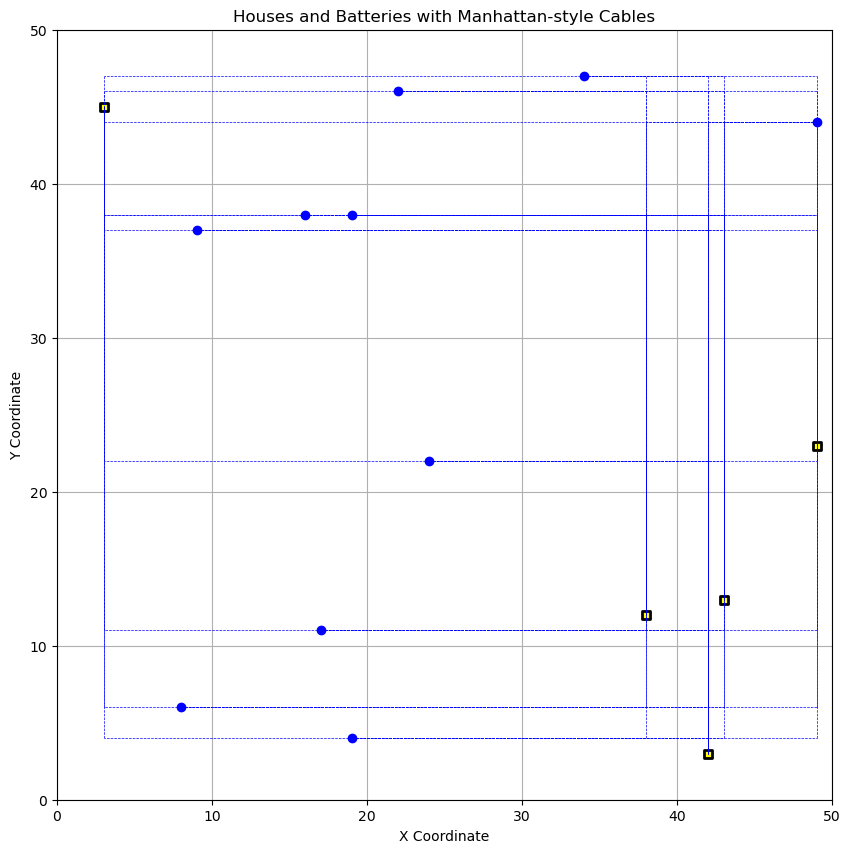

In [3]:
# create a 50x50 grid plot
plt.figure(figsize=(10, 10))
plt.axis([0, 50, 0, 50])
plt.grid()

# plot the houses and batteries
first_ten_houses = first_n_items_of_dict(houses, 10)

for house_position in first_ten_houses.keys():
    plt.scatter(*house_position, color='blue', label='House')

for battery_position in first_five_batteries.keys():
    plt.scatter(*battery_position, color='yellow', edgecolors='black', linewidth=0.5, marker='s', label='Battery')

    # connect each house manhattan style to nearest points
    for house_position in first_ten_houses.keys():
        #find a corner point: https://www.geeksforgeeks.org/find-the-integer-points-x-y-with-manhattan-distance-atleast-n/
        corner_point = battery_position[0], house_position[1]

        # draw horizontal line 
        plt.plot([house_position[0], corner_point[0]], [house_position[1], corner_point[1]], 'b--', linewidth=0.5)

        # draw vertical line (corner to battery)
        plt.plot([corner_point[0], battery_position[0]], [corner_point[1], battery_position[1]], 'b--', linewidth=0.5)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Houses and Batteries with Manhattan-style Cables')

plt.show()